# OpenCV color spaces
Here we convert images to different color spaces

## Imports
Includes our own libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Download images
You might be able to skip this if you already have the images from a previous run...

In [3]:
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz -P ./tmp/
# !tar -xf ./tmp/wiki.tar.gz -C ./tmp/

## Read image and show

In [4]:
from lib.imageutil import show_image

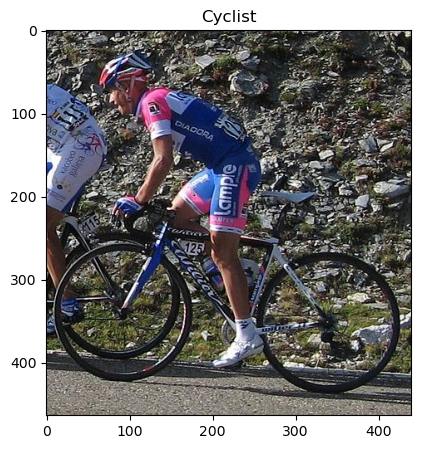

In [5]:
image = cv2.imread('./tmp/wiki/00/11328300_1980-06-10_2008.jpg')
show_image(image, "Cyclist")

## Convert to grayscale
We now use cvtColor to convert the image to grayscale.

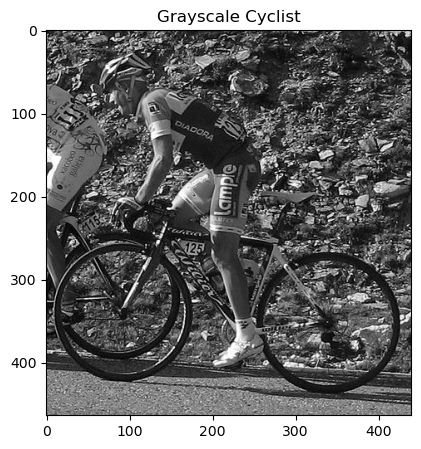

In [6]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(grayscale_image, "Grayscale Cyclist")

## Grayscale Image Shape

In [7]:
print(f'Colored image shape: {image.shape}')
print(f'Grayscale image shape: {grayscale_image.shape}')

Colored image shape: (464, 440, 3)
Grayscale image shape: (464, 440)


## Split Colors
We now use opencv to split the image into its seperate color channels

In [8]:
b, g, r = cv2.split(image)
print(r.shape)
print(g.shape)
print(b.shape)


(464, 440)
(464, 440)
(464, 440)


Each color will look like grayscale on its own

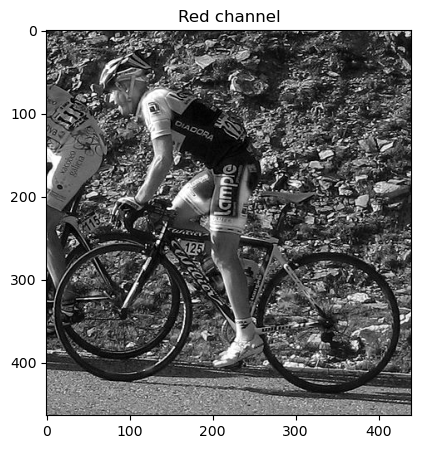

In [9]:
show_image(r, "Red channel")

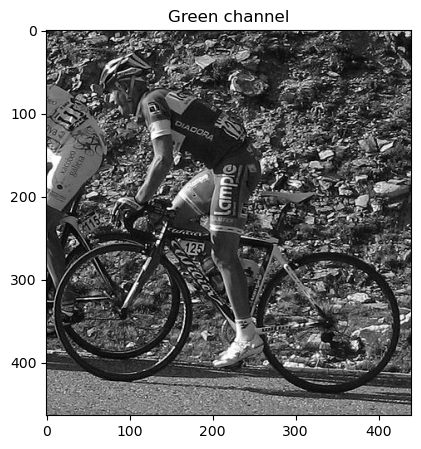

In [10]:
show_image(g, "Green channel")

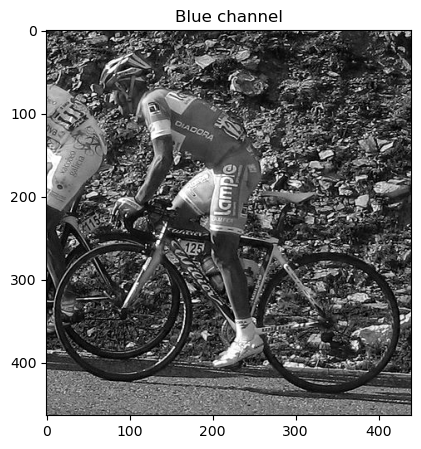

In [11]:
show_image(b, "Blue channel")

To see what each channel actually would look like, we need to create colored images again but setting the other channels to zeros first.

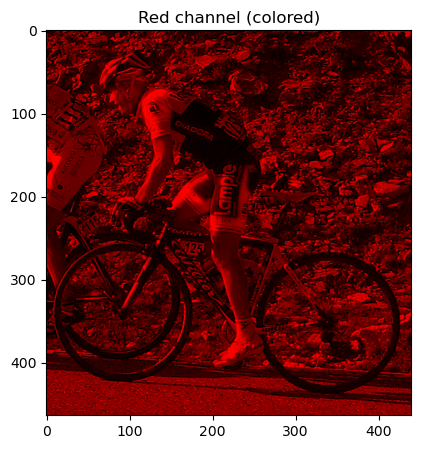

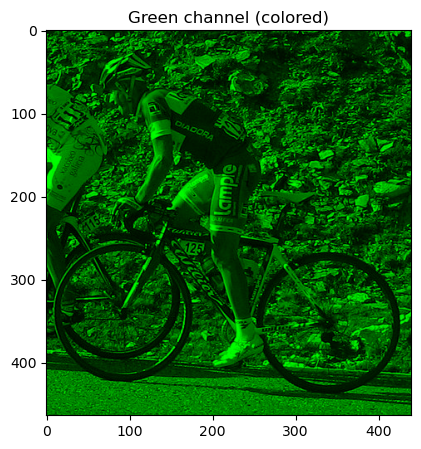

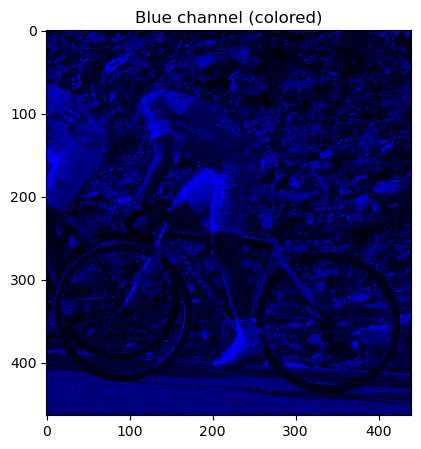

In [12]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")

show_image(cv2.merge([zeros, zeros, r]), "Red channel (colored)")
show_image(cv2.merge([zeros, g, zeros]), "Green channel (colored)")
show_image(cv2.merge([b, zeros, zeros]), "Blue channel (colored)")

We can also merge the three layers again to get the original image back

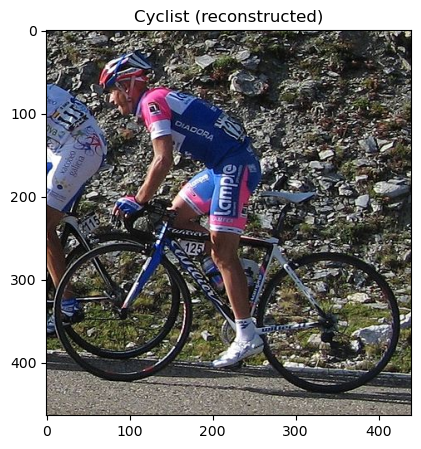

In [13]:
reconstructed = cv2.merge([b, g, r]) 
show_image(reconstructed, "Cyclist (reconstructed)") 

Now lets increase one of the layers

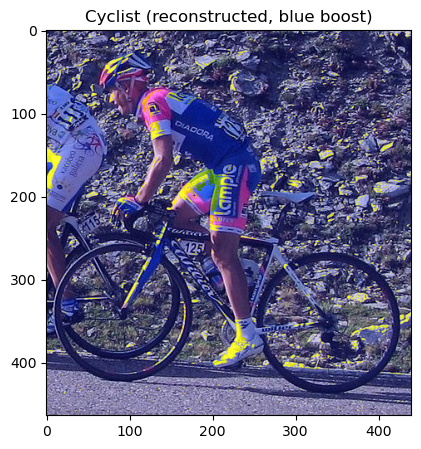

In [14]:
reconstructed = cv2.merge([b+50, g, r]) 
show_image(reconstructed, "Cyclist (reconstructed, blue boost)") 

## The HSV color space

HSV is an alternative representation to RGB.  
https://en.wikipedia.org/wiki/HSL_and_HSV

Hue: 0 - 179
Saturation: 0 - 255
Value (Intensity): 0 - 2

First, we convert an RGB image to HSV55

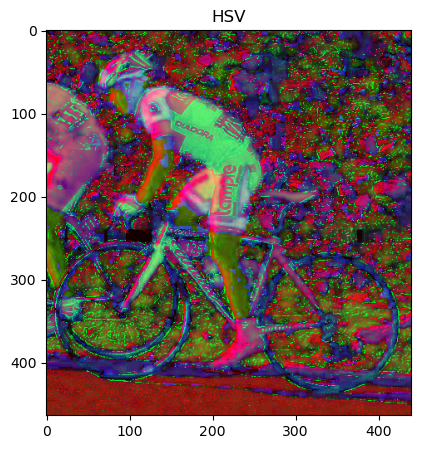

In [15]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
show_image(hsv_image, 'HSV')

This looks strange because we try to re-interpret an HSV-image as BGR in the `show_image` function.
By adding another parameter, we can fix this.

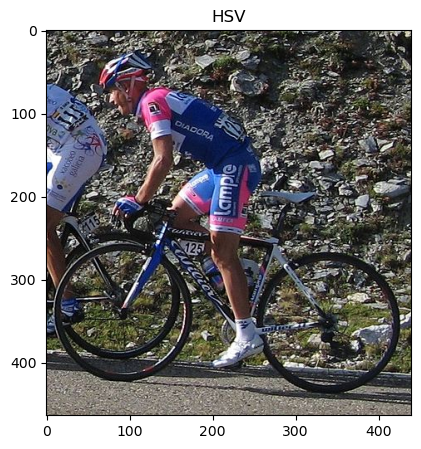

In [17]:
show_image(hsv_image, 'HSV', color_conversion = cv2.COLOR_HSV2RGB)

Now we want to view each channel in the HSV color space as a grayscale image

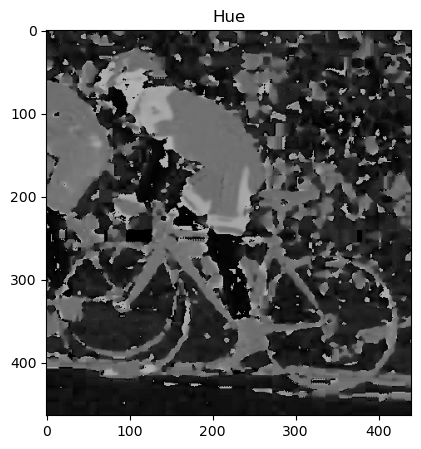

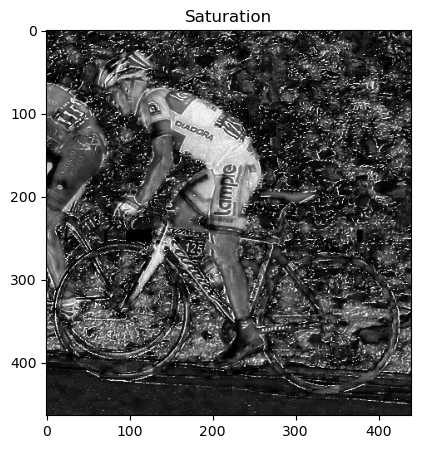

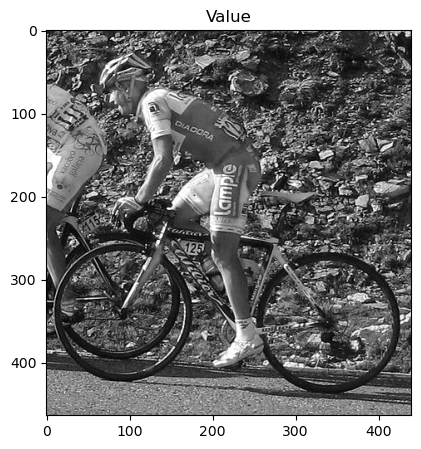

In [18]:
show_image(hsv_image[:, :, 0], "Hue", )
show_image(hsv_image[:, :, 1], "Saturation")
show_image(hsv_image[:, :, 2], "Value")

We can also try to manipulate whole channels here

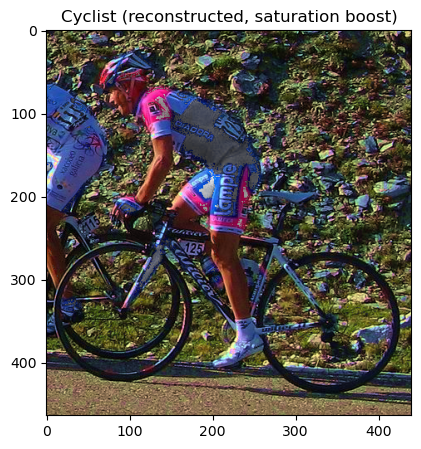

In [24]:
reconstructed = cv2.merge([hsv_image[:, :, 0], hsv_image[:, :, 1]+75, hsv_image[:, :, 2]]) 
show_image(reconstructed, "Cyclist (reconstructed, saturation boost)", color_conversion = cv2.COLOR_HSV2RGB) 